# Xác định các vị trí Lysine bị phosphoglyceryl hóa

 Nguyễn Hồng Quang
 
 Khoa Kỹ thuật máy tính
 
 Trường Công nghệ thông tin và Truyền thông
 
 Trường Đại học Bách Khoa Hà Nội
 
 Tháng 12 / 2021

 Reference: RAM-PGK: Prediction of Lysine Phosphoglycerylation Based on Residue Adjacency Matrix 
 
 https://www.mdpi.com/2073-4425/11/12/1524
 # Bài toán:
 Cho mỗi protein ở dạng chuỗi amino acids. Hãy xác định các vị trí Lysine nào bị phosphoglyceryl hóa
 
# Dataset 
Tập dữ liệu có 91 sequences, với tổng cộng số amino acid LYSINE là 3360: trong đó có 111 vị trí bị phosphoglyceryl và 3249 vị trí không bị. 

 
 # Ví dụ :
 EEIRCYVRDKEMNSQVYSRLTSRGTVKVKSSNIQV
 
 Chuỗi này gồm có 3 Lysine (mã hóa bởi ký tự K, còn ký tự L mã hóa cho Leusine), trong đó Lysine đầu tiên bị phosphoglyceryl hóa, còn 2 Lysine còn lại không bị. 
 
 # Phương pháp đánh giá -  3.3. Test Scheme
The assessment of our predictor’s performance was carried out via the sixfold cross-validation scheme. The statistical measures discussed in the previous section were calculated for each fold and were then finally averaged to determine the predictor’s overall performance. The validation scheme of this work is generally known as the n-fold cross-validation scheme. Apart from this, there are two other well-known schemes to determine the effectiveness of a predictor, which are called the independent dataset test and the jackknife test [53,54]. From the three validation schemes, the jackknife scheme is said to be the least arbitrary, whereby it yields distinct results on the dataset [55]. However, we employed the n-fold cross-validation scheme primarily to avoid the high computational time.

The sixfold cross-validation scheme was carried out using the steps highlighted below:

Step 1: Divide the dataset into six similar parts.

Step 2: Combine the five parts and apply the cleaning treatment to balance the positive and negative classes. Train the predictor using this balanced dataset and test it with the part left out.

Step 3: Set the predictor parameters with the train set.

Step 4: Acquire the statistical measures on the test set.

Step 5: Repeat steps 2 to 4 for the remainder of the folds.

 
# Kết quả State-of-the-Arts: 
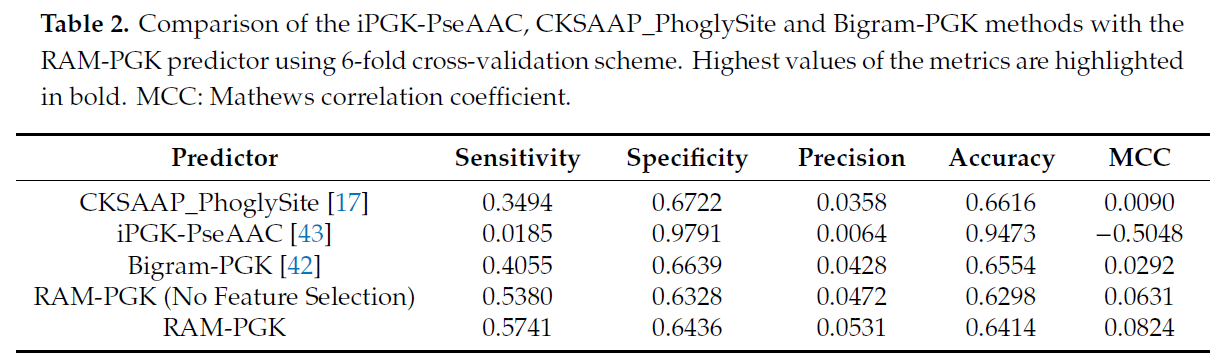

# Đọc và phân tích dữ liệu từ file data
File data được cho ở định dạng Mat file (của Matlab)

In [2]:
import scipy.io as sio

In [3]:
file_dataset = "./RAM-PGK-master/Phosphoglycerylationstruct.mat"
dataset = sio.loadmat(file_dataset)

In [4]:
#print(dataset)
sorted(dataset.keys())
print(dataset["DB_Phosphoglycerylation"].shape)

(1, 91)


In [5]:
first_sequence = dataset["DB_Phosphoglycerylation"][0][0]
sequences = dataset["DB_Phosphoglycerylation"][0]
print(len(sequences))

91


In [10]:
# Chỉ số 0: lưu trữ dãy amino acid
sequence = first_sequence[0][0][0][0]
total_sequence = ''
for i, s in enumerate(sequences):
    total_sequence += s[0][0][0][0]
# print(len(sequence), "\n", sequence)
total_lysin_pos = [i for i, s in enumerate(total_sequence) if s == "K"]
# Các vị trí Lysine trong chuỗi:
# print("Vị trí Lysine bị phosphoglyceryl hóa: ", lysin_pos)
#print(sequence[180:215])
print(len(total_lysin_pos))
print((set(total_sequence)))

3360
{'V', 'X', 'Y', 'D', 'T', 'S', 'L', 'I', 'W', 'H', 'Q', 'N', 'G', 'A', 'K', 'M', 'R', 'P', 'C', 'F', 'E'}


In [18]:
# Chỉ số 1: lưu trữ chiều dài chuỗi 
print(first_sequence[1])

[[159]]


In [19]:
print(first_sequence[2])

[[array(['A2A5N1'], dtype='<U6')]]


In [24]:
# 0: amino acid LYSINE không bị phosphoglyceryl hóa (non-phosphoglycerylation sites)
# 1: amino acid LYSINE phosphoglyceryl hóa (phosphoglycerylation sites)
# 2 là amino acid bình thường khác 
label = first_sequence[3][0][0][0]
print(label)

222202222202022222222222222202222222222222222222221222222222222222222022222002222022220222222222222222220222222222220222202022222222222222202222222222222222220


In [23]:
print(len(first_sequence[4]))
print(first_sequence[4][0:2])
print("Vị trí Lysine bị phosphoglyceryl hóa: ", 
      [i for i, s in enumerate(first_sequence[4]) if s == "1"])

for index, s in enumerate(first_sequence[4]): 
    print(s, end = "")


159
['2' '2']
Vị trí Lysine bị phosphoglyceryl hóa:  [50]
222202222202022222222222222202222222222222222222221222222222222222222022222002222022220222222222222222220222222222220222202022222222222222202222222222222222220

In [38]:
# Mã hóa mỗi amino acid bởi 20 tham số : ma trận BLOSUM62 ? 
print(first_sequence[5].shape)
print(first_sequence[5][0])

(1105, 20)
[-1 -1 -2 -3 -2  0 -2 -3 -2  1  2 -1  6  0 -3 -2 -1 -2 -1  1]


In [39]:
print(first_sequence[6])

[[array(['M'], dtype='<U1')]
 [array(['V'], dtype='<U1')]
 [array(['R'], dtype='<U1')]
 ...
 [array(['L'], dtype='<U1')]
 [array(['T'], dtype='<U1')]
 [array(['S'], dtype='<U1')]]


In [46]:
# Biểu diễn mỗi amino acid bởi 1 tham số : ? 
print("Shape: ", first_sequence[7].shape)
print(first_sequence[7][0:2])

Shape:  (1105, 1)
[[128.5]
 [ 93.5]]


In [45]:
# Biểu diễn mỗi amino acid bởi 1 tham số : ?
print("Shape: ", first_sequence[8].shape)
print(first_sequence[8])

Shape:  (1105, 1)
[[ -97.5]
 [-104. ]
 [-108. ]
 ...
 [ -77.6]
 [-101.3]
 [ -95.8]]


In [48]:
# Biểu diễn mỗi amino acid bởi 1 tham số : ?
print("Shape: ", first_sequence[9].shape)
print(first_sequence[9])

Shape:  (1105, 1)
[[131.7]
 [133.7]
 [136.9]
 ...
 [ 14.6]
 [134.6]
 [134.9]]


In [49]:
# Biểu diễn mỗi amino acid bởi 1 tham số : ?
print("Shape: ", first_sequence[10].shape)
print(first_sequence[10])

Shape:  (1105, 1)
[[116. ]
 [119.8]
 [124. ]
 ...
 [103.8]
 [114.2]
 [114.5]]


In [50]:
# Biểu diễn mỗi amino acid bởi 1 tham số : ?
print("Shape: ", first_sequence[11].shape)
print(first_sequence[11])

Shape:  (1105, 1)
[[-148.2]
 [-150.8]
 [-147.3]
 ...
 [  90.3]
 [ 114.3]
 [-155.4]]


In [51]:
# Biểu diễn mỗi amino acid bởi 1 tham số : ?
print("Shape: ", first_sequence[12].shape)
print(first_sequence[12])

Shape:  (1105, 1)
[[0.702]
 [0.581]
 [0.769]
 ...
 [0.827]
 [0.949]
 [0.948]]


In [52]:
# Biểu diễn mỗi amino acid bởi 1 tham số : ?
print("Shape: ", first_sequence[13].shape)
print(first_sequence[13])

Shape:  (1105, 1)
[[0.267]
 [0.369]
 [0.204]
 ...
 [0.058]
 [0.011]
 [0.012]]


In [53]:
# Biểu diễn mỗi amino acid bởi 1 tham số : ?
print("Shape: ", first_sequence[14].shape)
print(first_sequence[14])

Shape:  (1105, 1)
[[0.005]
 [0.008]
 [0.004]
 ...
 [0.1  ]
 [0.043]
 [0.034]]


In [54]:
# Biểu diễn mỗi amino acid bởi 3 tham số : ?
print("Shape: ", first_sequence[15].shape)
print(first_sequence[15])

Shape:  (1105, 3)
[[0.702 0.267 0.005]
 [0.581 0.369 0.008]
 [0.769 0.204 0.004]
 ...
 [0.827 0.058 0.1  ]
 [0.949 0.011 0.043]
 [0.948 0.012 0.034]]


In [55]:
# Biểu diễn mỗi amino acid bởi 1 ký tự : 'C' ?
print("Shape: ", first_sequence[16].shape)
print(first_sequence[16])

Shape:  (1105, 1)
[[array(['C'], dtype='<U1')]
 [array(['C'], dtype='<U1')]
 [array(['C'], dtype='<U1')]
 ...
 [array(['C'], dtype='<U1')]
 [array(['C'], dtype='<U1')]
 [array(['C'], dtype='<U1')]]


In [59]:
# Biểu diễn mỗi amino acid bởi 1 tham số : ?
print("Shape: ", first_sequence[17].shape)
print(first_sequence[17])

seq = first_sequence[17][0]
print("Len sequence: ", len(seq))

Shape:  (1,)
['CCCCCCCCCCCCCCCCCCCCCCCCHHCHCCCHHHCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHCCCCCCCCEEEECCCCCCCCCCCCCCHHCCCCCCHHHHHHHHHHHHCHHHHHHHHHHHHHHCCCCHCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHCHCHCEECCCCEECCCCHCEECCEEEECCCEEEECCEEEEEECCCCCCEEEEEEECCCCCCCEEECECCHCCCCCCHHHHECEEEEEEECCCCCCCEECEEEEEECCCCCCCCCCCCHHHHEECCCEEECCCEEEEEEECCHHHHHHHCCCCCCCCCCHHHHHHCHHHHHHHHHHHHHHHHHHHCCCCCCHHHHHHHHHHHHHCCCCCEEHHECHCHHHHHHHHHHHCCCCCCCCEEEECCCCCCCCEEEEEEECCCCCEECCCEEEEEEECCEECCCHCHHHHHHHHHHHHCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHCCCCCCEECCCCECCHHHHHHHHCHCCCCEEECCCCEEEEEEECCCCCCEEEEECCCEEEEEECCCCEEEEEEEEECECCCCCCCCEEEEEECCCCEEEEEECHHHHHHHHHHCCCCHHHHHHHHHHHHCCEEEEEEECCCCHHHHHHHHHHHHHCCHCCCCHHHHHHHHHHHHHHCCHHHHCCCCCHHHHCCCHHHHHHHHHCCCEEEEECCCCCHHCCHEEHECCCECCCCCEEEEEECCCHHHHHHHHHHHHHCCCEEEEECCHHHHHHHHHCHHHHHHHHCCCCEEEEECCCHHHHHHHHHHHHHHHCCCEEEECCCCCCHHHHHHCCCEEEECCCCCCCCCCCCCCCHHHHHHHHHHHHCCCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHCCHHHHHHHHHHHHHHHHHCCHHHHHHCCCCCCHHHHHHCHHHHHHHCCCCCCCHHHHHHH

In [60]:
# Biểu diễn mỗi amino acid bởi 20 tham số : ma trận ? 
print("Shape: ", first_sequence[18].shape)
print(first_sequence[18])

Shape:  (1105, 20)
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0  78]
 [  0 100   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0  17]
 [ 13   0   7 ...   0   0   2]
 [  0   0  10 ...   0   0   0]]
